<a href="https://colab.research.google.com/github/annabashlakova/ECON3916-Statistical-Machine-Learning/blob/main/Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Defining Econonomies:
# UKR (Ukraine), UMC (Upper Middle income) WLD (world)
country_codes = ['UKR', 'UMC', 'WLD']
indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const', # Standard of Living
    'SL.TLF.CACT.Zs': 'Labor_Part_Rate',      # labour supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',    # labor friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',    # total workers
    'NY.GDP.MKTP.KD': 'GDP_Const',            # econ size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',        # stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',    # savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',  # investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',          # exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',          # imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',       # gov revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'           # gov spending
}

In [19]:
# 1. Fetch Data
print('Fetching data...')
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000,2025))

# 2. Tramspose
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

#5. Extract Ukraine for specific calculations
df_ukr = df.xs('UKR', axis =1, level=0,). copy()

Fetching data...


In [22]:
# 1. Natural rate of unemp
df_ukr['Natural_Rate_Unemp'] = df_ukr['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity
if 'Labor_Force_Total' in df_ukr.columns:
    df_ukr['Productivity'] = df_ukr['GDP_Const'] / df_ukr['Labor_Force_Total']
else:
    print("Warning: 'Labor_Force_Total' data is not available for Ukraine. Productivity not calculated.")
    df_ukr['Productivity'] = float('nan') # Assign NaN or handle as appropriate

# 3. Net Capital Outflow (Exports - Imports)
df_ukr['NCO'] = df_ukr['Exports_GDP'] - df_ukr['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_ukr['Budget_Balance'] = df_ukr['Tax_Rev_GDP'] - df_ukr['Gov_Exp_GDP']

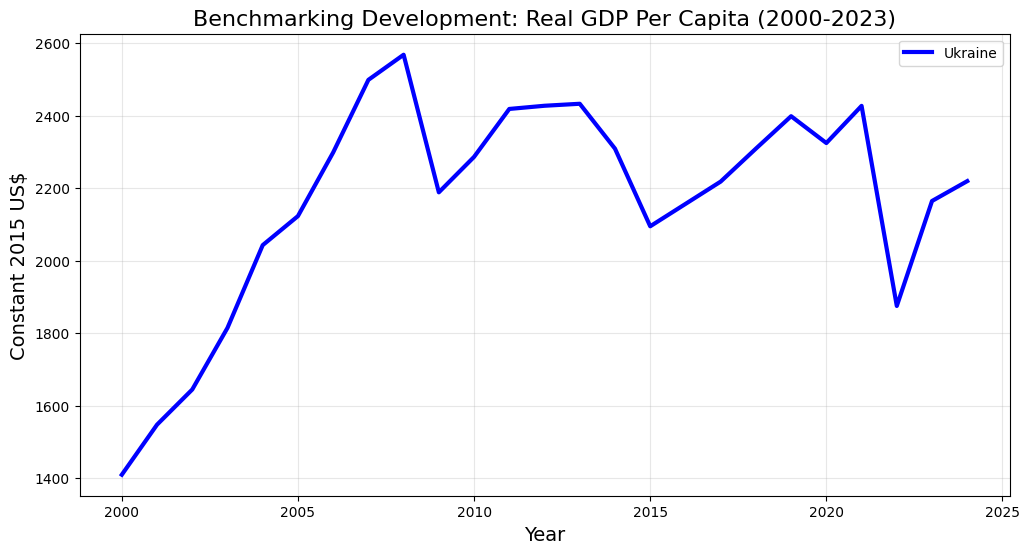

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('UKR', 'GDP_Per_Capita_Const')], label = 'Ukraine', color ='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Constant 2015 US$', fontsize = 14)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

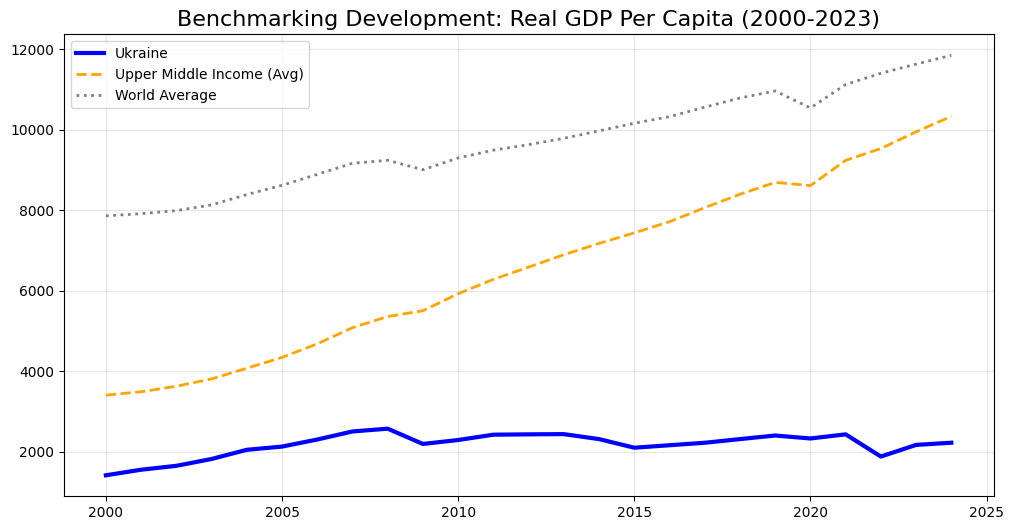

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('UKR', 'GDP_Per_Capita_Const')], label = 'Ukraine', color ='blue', linewidth=3)
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)


plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize = 16)
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

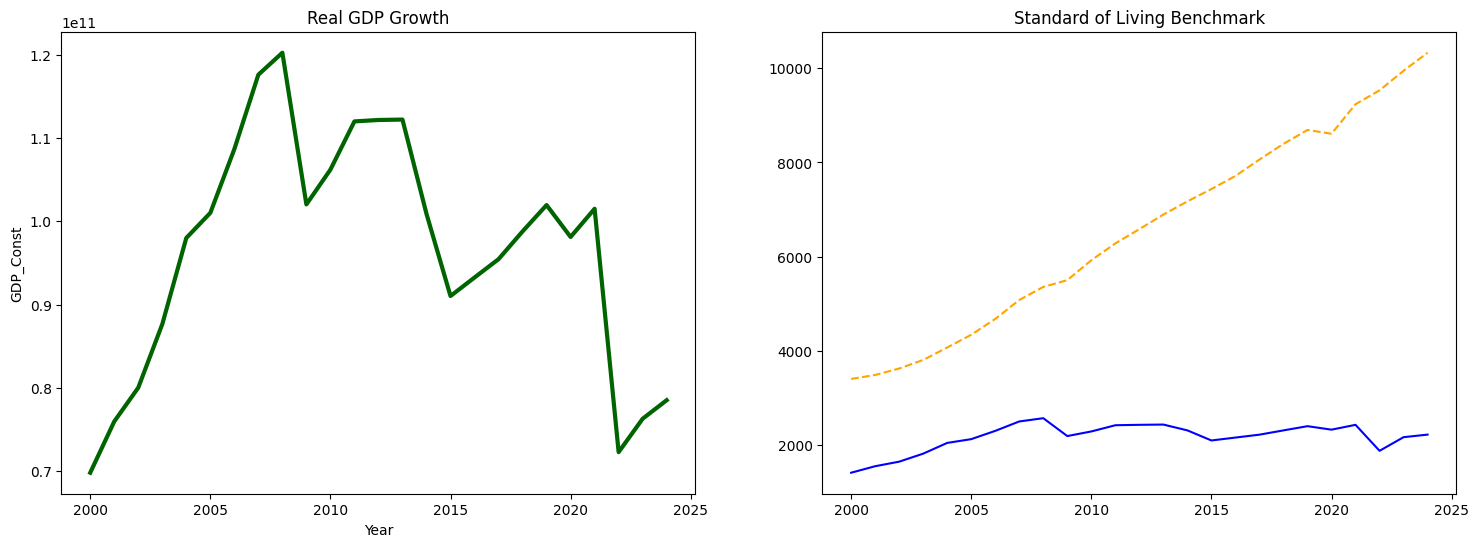

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))

# Chart A: Total GDP
sns.lineplot(data=df_ukr, x=df_ukr.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')


# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('UKR', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()


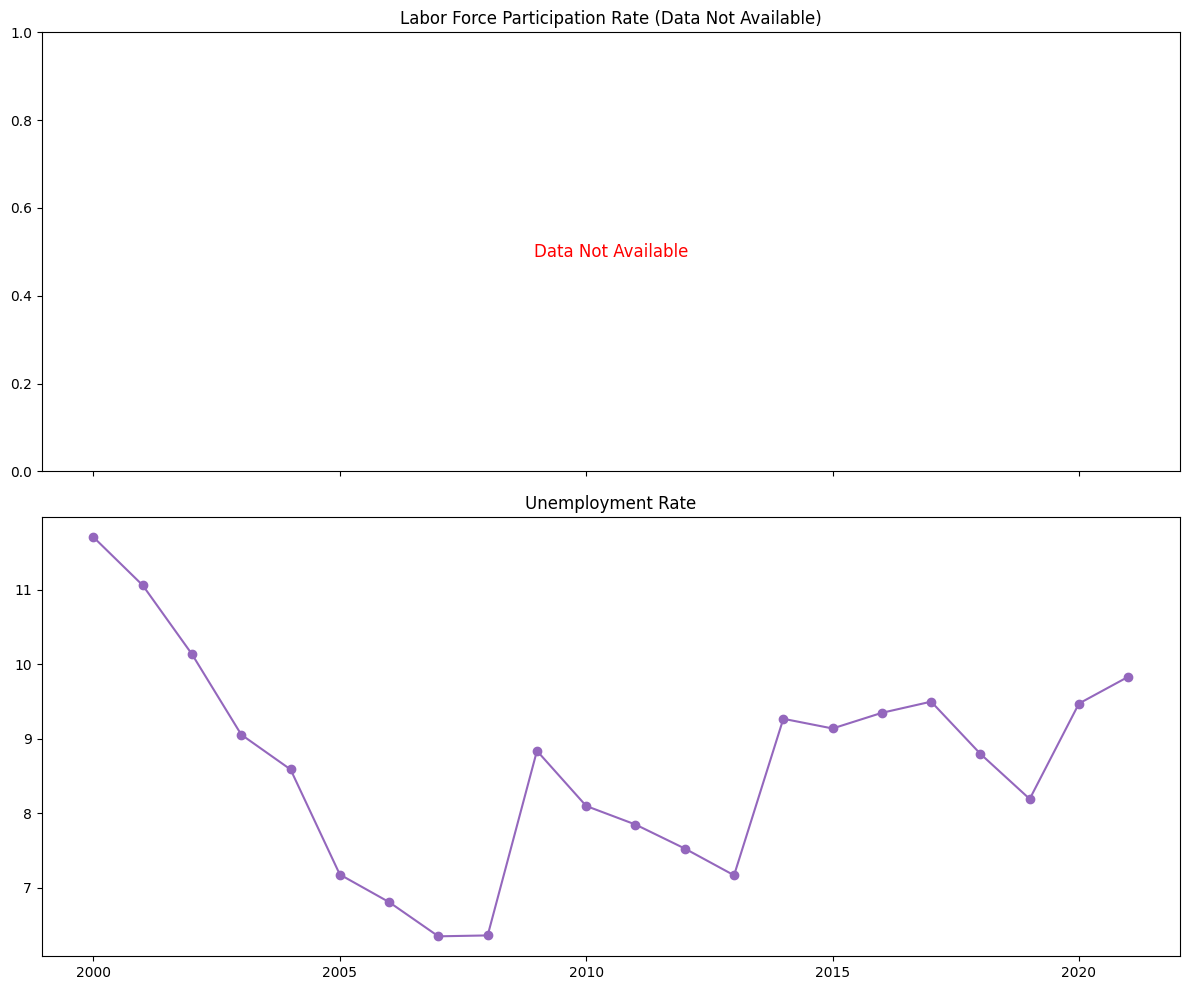

In [32]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)

# Top: Participation
if 'Labor_Part_Rate' in df_ukr.columns:
    ax1.plot(df_ukr.index, df_ukr['Labor_Part_Rate'], color='tab:green', marker='o')
    ax1.set_title('Labor Force Participation Rate')
else:
    ax1.set_title('Labor Force Participation Rate (Data Not Available)')
    ax1.text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=12, color='red')

# Bottom: Unemployment
ax2.plot(df_ukr.index, df_ukr['Unemployment_Rate'], color='tab:purple', marker='o')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

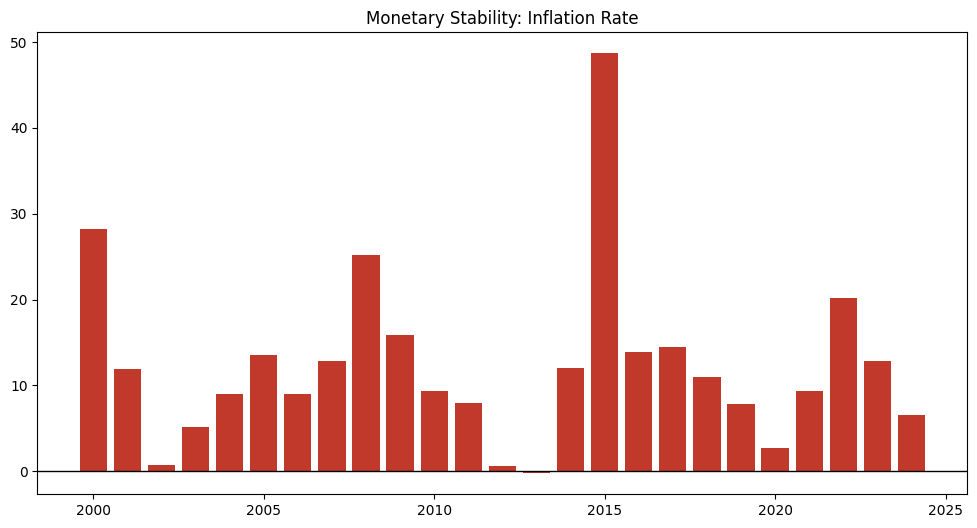

In [33]:
from seaborn.palettes import color_palette
plt.figure(figsize=(12, 6))
plt.bar(df_ukr.index, df_ukr['Inflation_CPI'], color='#c0392b')
plt.axhline(0, color='black', linewidth = 1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

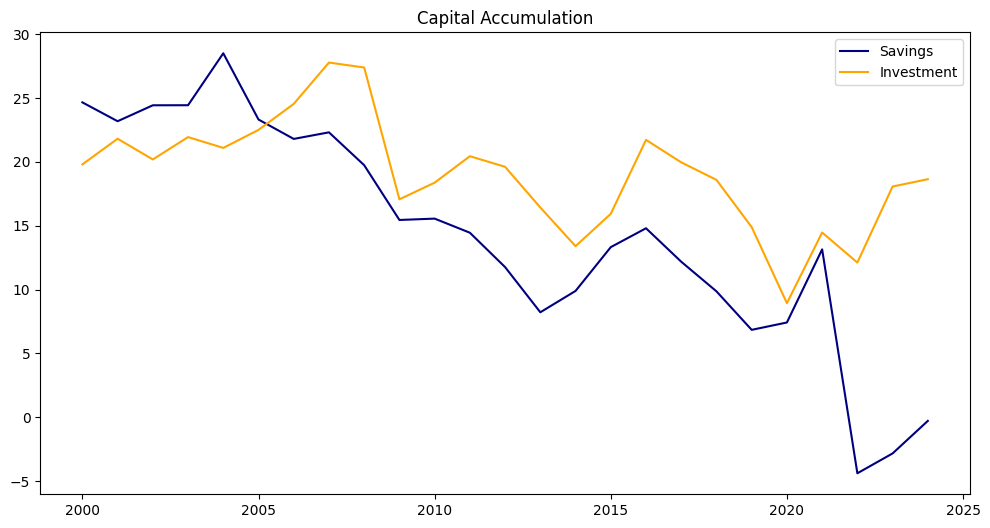

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df_ukr.index, df_ukr['Gross_Dom_Savings'], label ='Savings', color='navy')
plt.plot(df_ukr.index, df_ukr['Gross_Cap_Formation'], label = 'Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

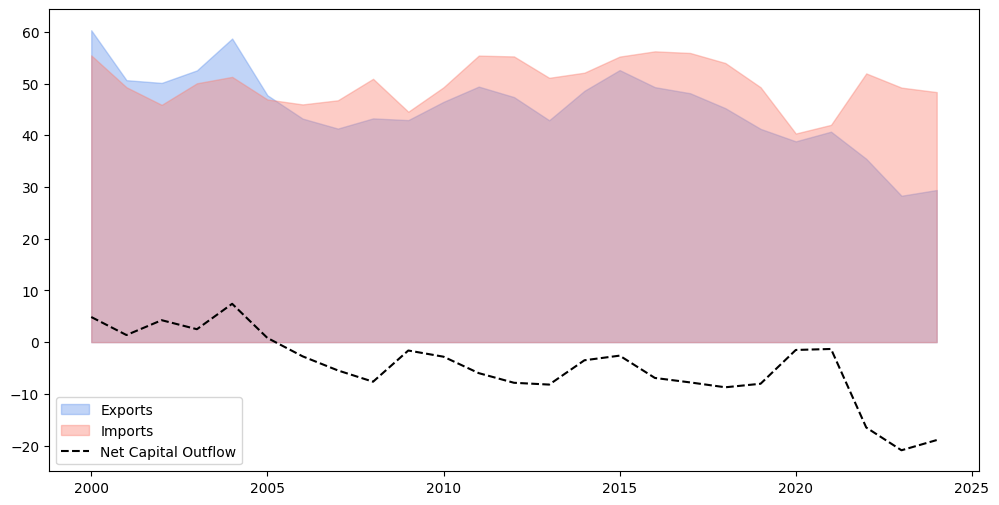

In [39]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_ukr.index, df_ukr['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_ukr.index, df_ukr['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_ukr.index, df_ukr['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

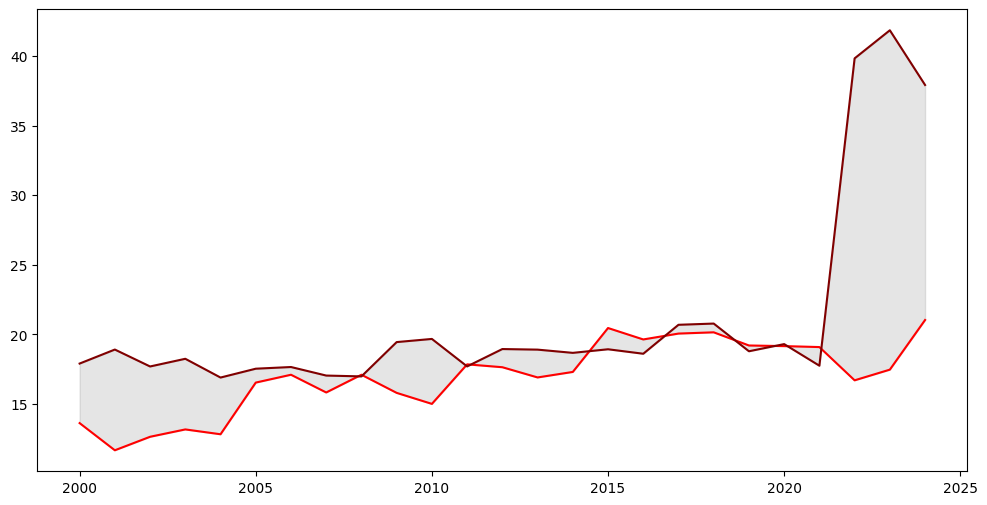

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df_ukr.index, df_ukr['Tax_Rev_GDP'], label='Revenue', color='red')
plt.plot(df_ukr.index, df_ukr['Gov_Exp_GDP'], label = 'Expenditure', color ='maroon')
plt.fill_between(df_ukr.index, df_ukr['Tax_Rev_GDP'], df_ukr['Gov_Exp_GDP'], color = 'gray', alpha = 0.2)
plt.show()

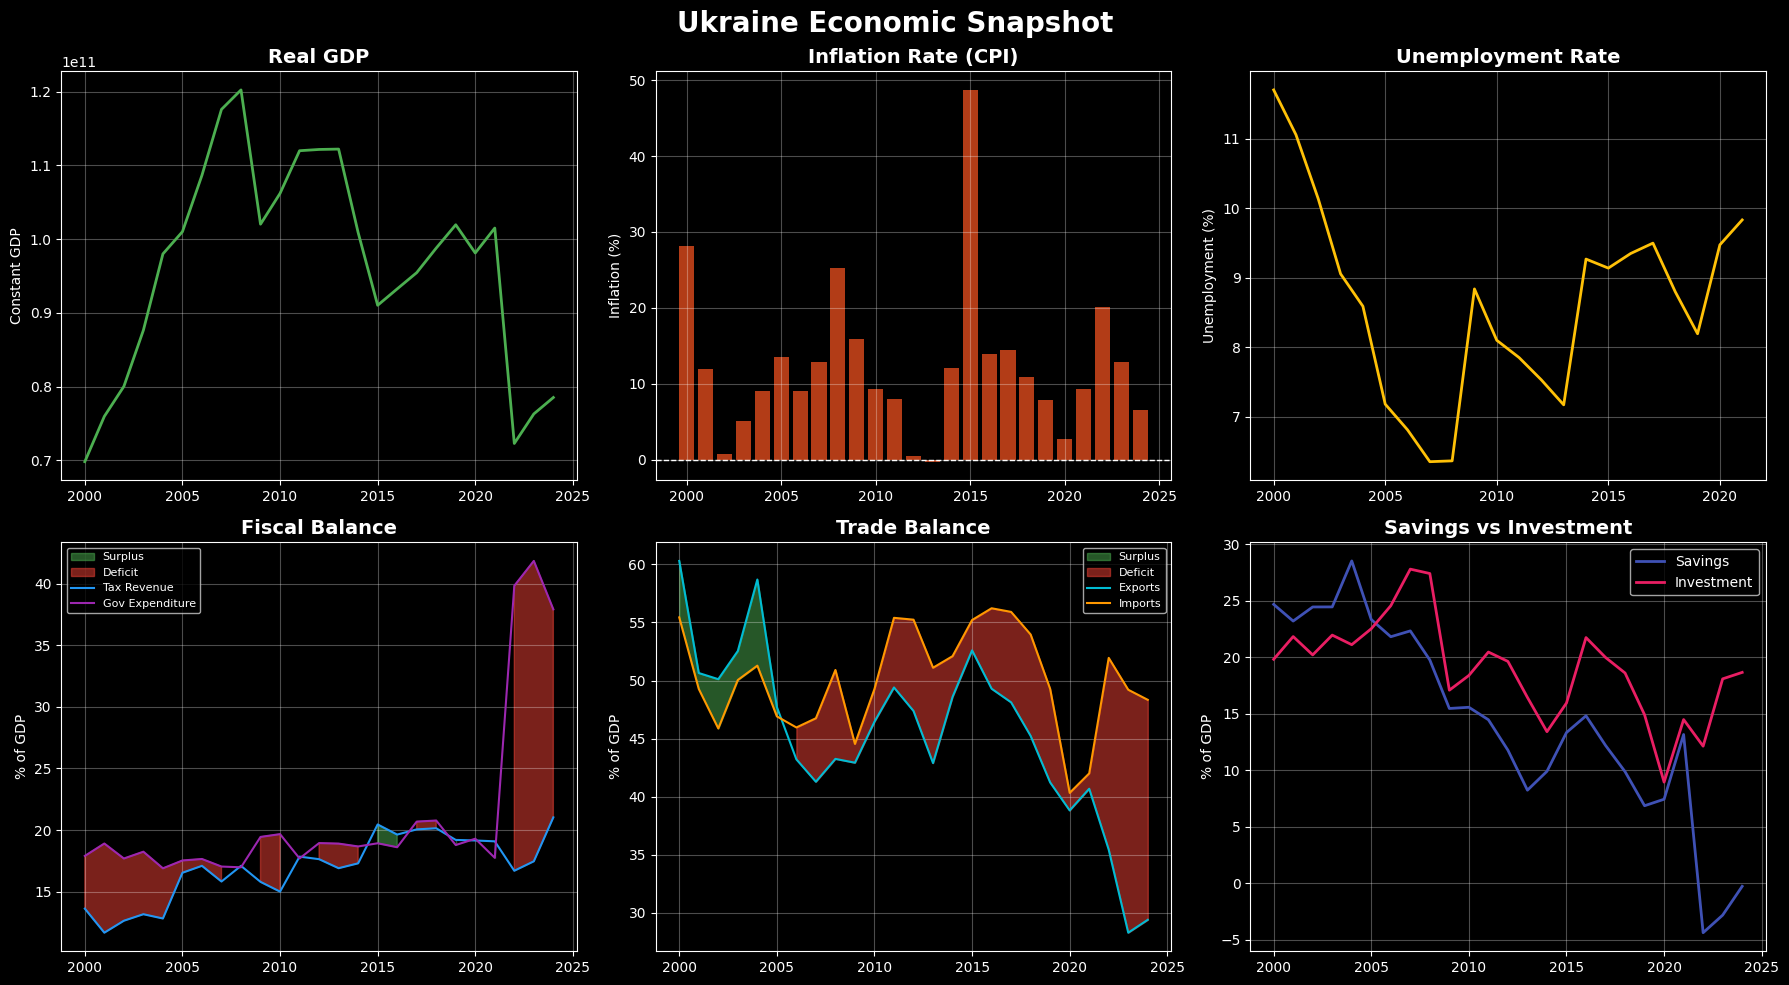

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark background style
plt.style.use('dark_background')

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes for easier indexing
ax = axes.flatten()

# 1. TOP LEFT: Real GDP (Line chart)
ax[0].plot(df_ukr.index, df_ukr['GDP_Const'], color='#4CAF50', linewidth=2)
ax[0].set_title('Real GDP', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Constant GDP')
ax[0].grid(alpha=0.3)

# 2. TOP MIDDLE: Inflation Rate (Bar chart with horizontal line at 0)
ax[1].bar(df_ukr.index, df_ukr['Inflation_CPI'], color='#FF5722', alpha=0.7)
ax[1].axhline(y=0, color='white', linestyle='--', linewidth=1)
ax[1].set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Inflation (%)')
ax[1].grid(alpha=0.3)

# 3. TOP RIGHT: Unemployment Rate (Line chart)
ax[2].plot(df_ukr.index, df_ukr['Unemployment_Rate'], color='#FFC107', linewidth=2)
ax[2].set_title('Unemployment Rate', fontsize=14, fontweight='bold')
ax[2].set_ylabel('Unemployment (%)')
ax[2].grid(alpha=0.3)

# 4. BOTTOM LEFT: Fiscal Balance (Fill between Tax Revenue and Gov Expenditure)
ax[3].fill_between(df_ukr.index, df_ukr['Tax_Rev_GDP'], df_ukr['Gov_Exp_GDP'],
                    where=(df_ukr['Tax_Rev_GDP'] >= df_ukr['Gov_Exp_GDP']),
                    color='#4CAF50', alpha=0.5, label='Surplus')
ax[3].fill_between(df_ukr.index, df_ukr['Tax_Rev_GDP'], df_ukr['Gov_Exp_GDP'],
                    where=(df_ukr['Tax_Rev_GDP'] < df_ukr['Gov_Exp_GDP']),
                    color='#F44336', alpha=0.5, label='Deficit')
ax[3].plot(df_ukr.index, df_ukr['Tax_Rev_GDP'], color='#2196F3', linewidth=1.5, label='Tax Revenue')
ax[3].plot(df_ukr.index, df_ukr['Gov_Exp_GDP'], color='#9C27B0', linewidth=1.5, label='Gov Expenditure')
ax[3].set_title('Fiscal Balance', fontsize=14, fontweight='bold')
ax[3].set_ylabel('% of GDP')
ax[3].legend(loc='best', fontsize=8)
ax[3].grid(alpha=0.3)

# 5. BOTTOM MIDDLE: Trade Balance (Fill between Exports and Imports)
ax[4].fill_between(df_ukr.index, df_ukr['Exports_GDP'], df_ukr['Imports_GDP'],
                    where=(df_ukr['Exports_GDP'] >= df_ukr['Imports_GDP']),
                    color='#4CAF50', alpha=0.5, label='Surplus')
ax[4].fill_between(df_ukr.index, df_ukr['Exports_GDP'], df_ukr['Imports_GDP'],
                    where=(df_ukr['Exports_GDP'] < df_ukr['Imports_GDP']),
                    color='#F44336', alpha=0.5, label='Deficit')
ax[4].plot(df_ukr.index, df_ukr['Exports_GDP'], color='#00BCD4', linewidth=1.5, label='Exports')
ax[4].plot(df_ukr.index, df_ukr['Imports_GDP'], color='#FF9800', linewidth=1.5, label='Imports')
ax[4].set_title('Trade Balance', fontsize=14, fontweight='bold')
ax[4].set_ylabel('% of GDP')
ax[4].legend(loc='best', fontsize=8)
ax[4].grid(alpha=0.3)

# 6. BOTTOM RIGHT: Savings vs Investment (Dual lines)
ax[5].plot(df_ukr.index, df_ukr['Gross_Dom_Savings'], color='#3F51B5', linewidth=2, label='Savings')
ax[5].plot(df_ukr.index, df_ukr['Gross_Cap_Formation'], color='#E91E63', linewidth=2, label='Investment')
ax[5].set_title('Savings vs Investment', fontsize=14, fontweight='bold')
ax[5].set_ylabel('% of GDP')
ax[5].legend(loc='best', fontsize=10)
ax[5].grid(alpha=0.3)

# Main title
fig.suptitle('Ukraine Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()